In [20]:
import pickle
import pandas as pd
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
# from sklearn.pipeline import make_pipeline, make_union
from base_models import get_model, get_base_model, get_XGBClassifier

In [22]:
# variables
train_data = 'train.csv'
date_format ='%m/%d/%Y %I:%M:%S %p'
model_file_name = 'finalized_model.sav'
all_features = ['FeaA', 'FeaB', 'FeaC', 'FeaD', 'FeaE', 'year', 'month', 'day', 'weekday', 'hour', 'minute', 'second']

In [5]:
# adding parser for datetime object
parser = lambda date: pd.datetime.strptime(date, date_format)
# load data from train data into a dataframe
df = pd.read_csv(train_data, delimiter=",", parse_dates=['Timestamp'], date_parser=parser)

In [6]:
# adding additional features from datetime object Timestamp
df['year'], df['month'], df['day'], df['weekday'], df['hour'], df['minute'], df['second'] = df['Timestamp'].dt.year, df['Timestamp'].dt.month, df['Timestamp'].dt.day, df['Timestamp'].dt.dayofweek, df['Timestamp'].dt.hour, df['Timestamp'].dt.minute, df['Timestamp'].dt.second

In [7]:
# create label for prediction
y = df[['Label']]

In [8]:
# prepare train data
df_train = df[all_features]

In [9]:
# show tail data
df_train.tail()

,FeaA,FeaB,FeaC,FeaD,FeaE,year,month,day,weekday,hour,minute,second
799995,1.683021,NaN,1.310556,2.135965,-2.9800,2017,8,28,0,10,53,26
799996,1.682958,NaN,1.337481,2.132880,-2.9733,2017,8,28,0,10,55,26
799997,1.683089,0.349964,1.342675,2.134424,-2.9667,2017,8,28,0,10,57,26
799998,1.682958,0.472871,1.326907,2.134038,-2.9600,2017,8,28,0,10,59,26
799999,1.683089,NaN,1.332225,2.133652,-2.9800,2017,8,28,0,11,1,26


In [10]:

# imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [11]:
# check for missing values
df_train.isnull().sum()

FeaA          40
FeaB       44376
FeaC         216
FeaD         194
FeaE       35488
year           0
month          0
day            0
weekday        0
hour           0
minute         0
second         0
dtype: int64

In [12]:
# fill missing values using average of corresponding columns
df_train = df_train.fillna(df_train.mean())

In [13]:
# split data into train test for vallidation
X_train, X_test, y_train, y_test = train_test_split( df_train.values, y, test_size=0.33, random_state=42)

In [14]:
# Calling model from base_model
model = get_XGBClassifier()

In [15]:
# fit model
model.fit(X_train, y_train)

/home/vishnu/.virtualenvs/dl/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vishnu/.virtualenvs/dl/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [17]:
# prediction
preds = model.predict(X_test)

/home/vishnu/.virtualenvs/dl/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.10%


In [23]:
# save model 
pickle.dump(model, open(model_file_name, 'wb'))

In [ ]:
# # load model
# loaded_model = pickle.load(open(filename, 'rb'))

In [26]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

In [28]:
print(model.feature_importances_)

[0.1677641  0.06928142 0.17606641 0.17320354 0.2920126  0.01116519
 0.02977383 0.01402806 0.00715717 0.01173776 0.         0.04780991]


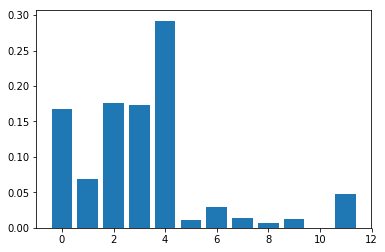

In [30]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

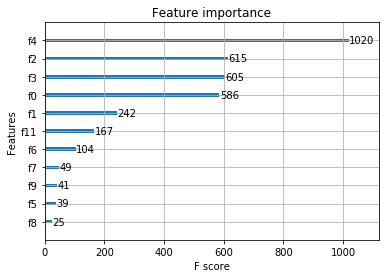

In [32]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
plt.show()

In [35]:
df.tail()

,Timestamp,FeaA,FeaB,FeaC,FeaD,FeaE,Label,year,month,day,weekday,hour,minute,second
799995,2017-08-28 10:53:26,1.683021,NaN,1.310556,2.135965,-2.9800,2,2017,8,28,0,10,53,26
799996,2017-08-28 10:55:26,1.682958,NaN,1.337481,2.132880,-2.9733,2,2017,8,28,0,10,55,26
799997,2017-08-28 10:57:26,1.683089,0.349964,1.342675,2.134424,-2.9667,2,2017,8,28,0,10,57,26
799998,2017-08-28 10:59:26,1.682958,0.472871,1.326907,2.134038,-2.9600,2,2017,8,28,0,10,59,26
799999,2017-08-28 11:01:26,1.683089,NaN,1.332225,2.133652,-2.9800,2,2017,8,28,0,11,1,26
